In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Загрузка датасета, проверка

In [3]:
train_data = pd.read_csv('/home/LTV.csv')

print(f'Размер датасета: {train_data.shape}')

train_data.head()

Размер датасета: (9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Информация о датасете:

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Проверка датасета на дубликаты

In [5]:
duplicates = train_data.duplicated()
train_data[duplicates]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


Вывод: Пустые значение в столбцах отсутствуют, дубликаты отсутствуют, датасет  представляет собой 24 столбца с разными типами значений: строковые и числовые.

### Визуализация данных

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [6]:
# Тренировочная выборка
X = train_data.drop('Customer Lifetime Value', axis = 1)

# Целевая переменная
y = pd.DataFrame(train_data['Customer Lifetime Value'])

Выделяем численные признаки от остальных

In [8]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else:
        str_cols.append(col)

print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [9]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

Построение словаря признаков для понимания графика признаков

In [10]:
dict_col = {
'Customer': 'идентификатор пользователя',
'State': 'штат',
'Customer Lifetime Value': 'LTV пользователя',
'Response': 'взаимодействие с рекламой',
'Coverage': 'тип страхового покрытия',
'Education': 'образование',
'Effective To Date': 'срок действия страховки',
'EmploymentStatus': 'трудоустройство',
'Gender': 'пол',
'Income': 'доход',
'Location Code': 'тип местности в которой проживает пользователь',
'Marital Status': 'семейное положение',
'Monthly Premium Auto': 'Ежемесячный Премиум Авто',
'Months Since Last Claim': 'месяцев с последнего требования по выплате компенсации',
'Months Since Policy Inception': 'месяцев с открытия страховки',
'Number of Open Complaints': 'количество незакрытых жалоб',
'Number of Policies': 'количество полисов',
'Policy Type': 'тип страховки',
'Policy': 'страховка',
'Renew Offer Type': 'обновленный тип предложения',
'Sales Channel': 'канал продаж',
'Total Claim Amount': 'сумма выплаченных компенсаций',
'Vehicle Class': 'класс автомобиля',
'Vehicle Size': 'размер автомобиля'
}

Построим графики и посмотрим на распределение признаков

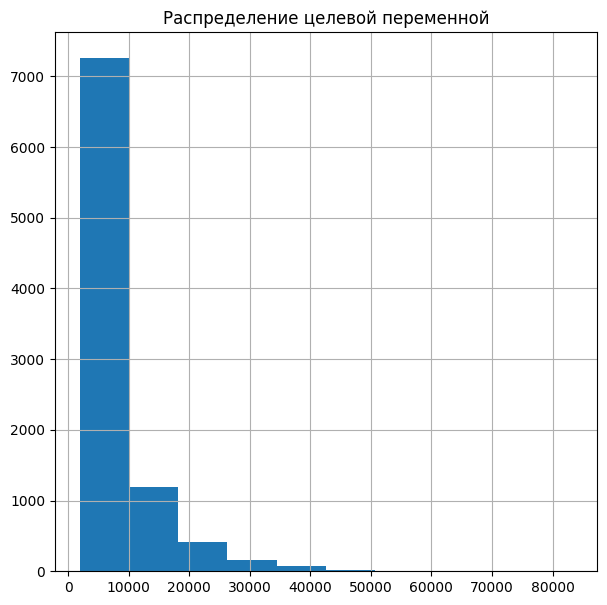

In [17]:
plt.figure(figsize = (7, 7))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

Распределение числовых признаков

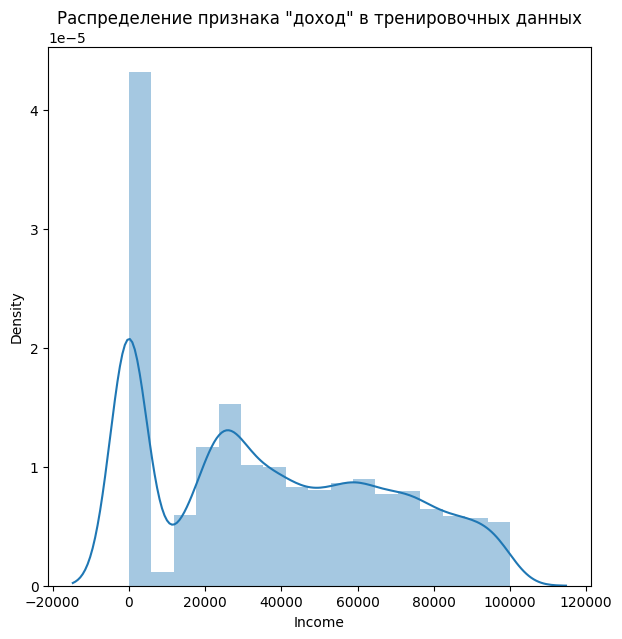

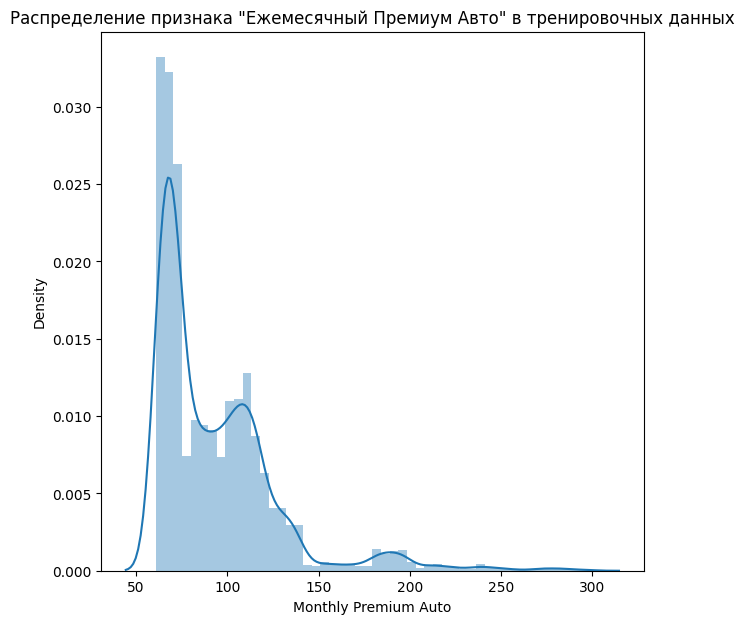

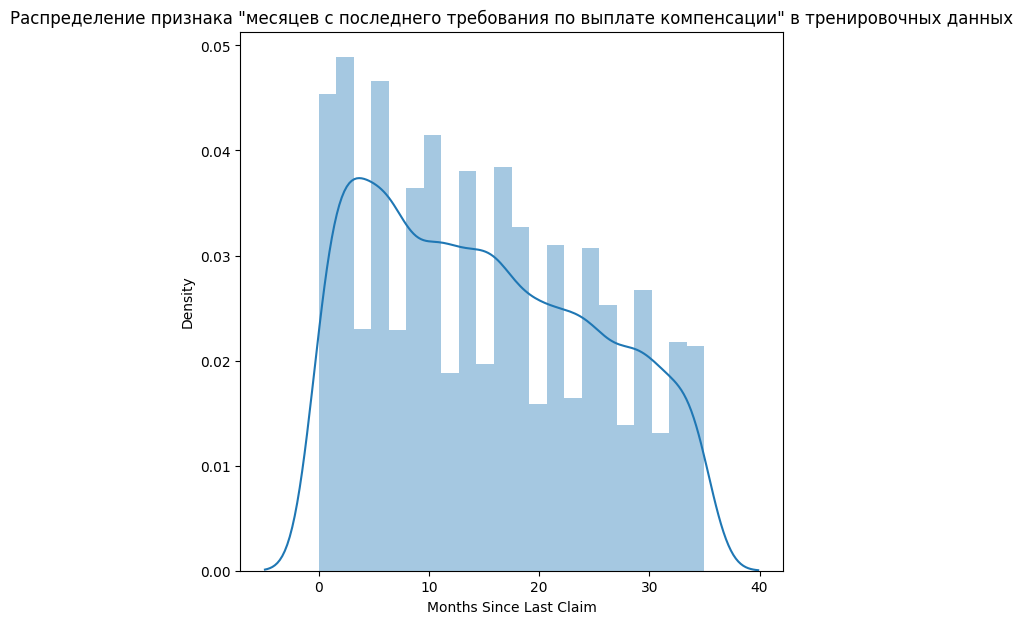

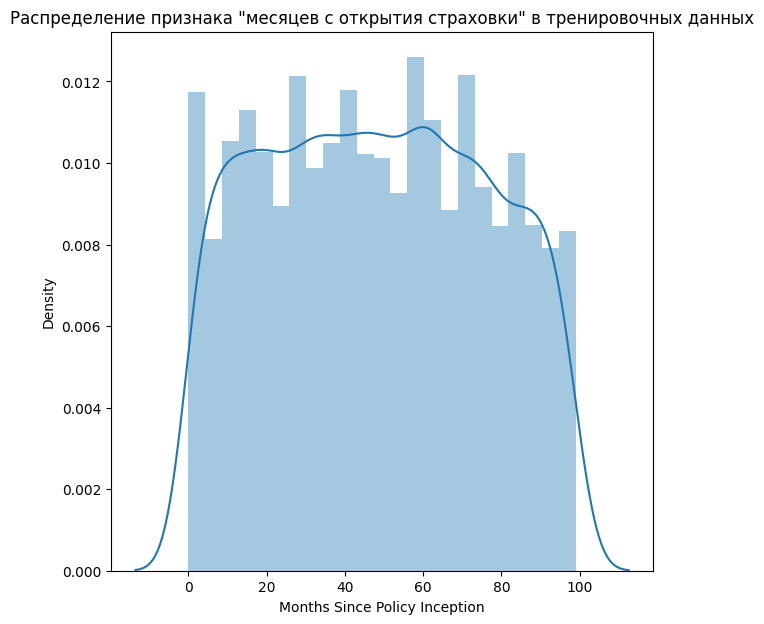

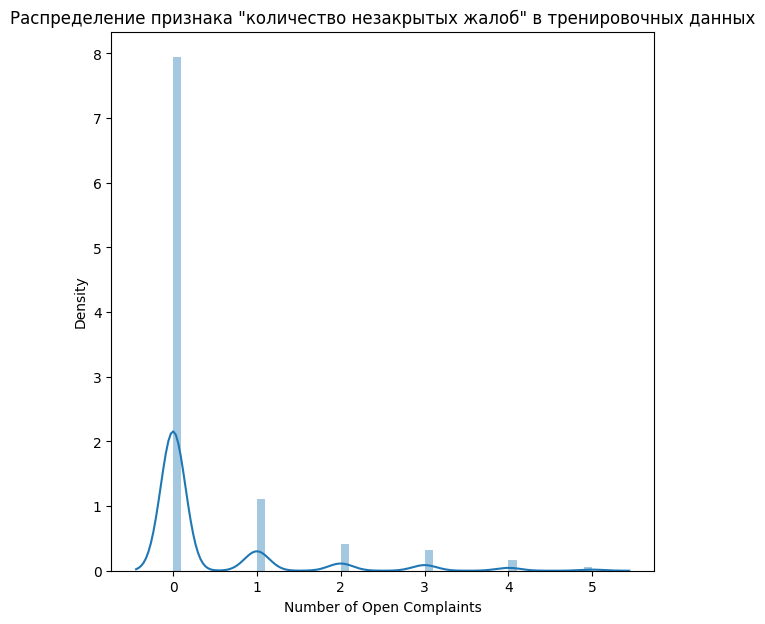

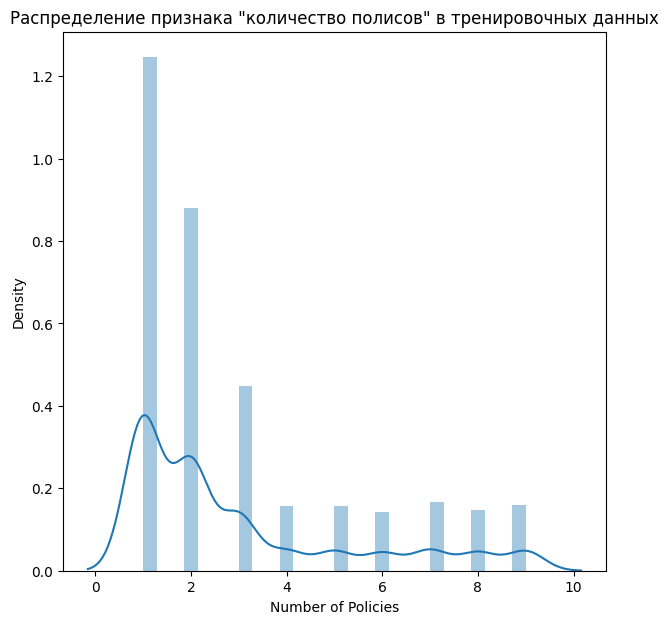

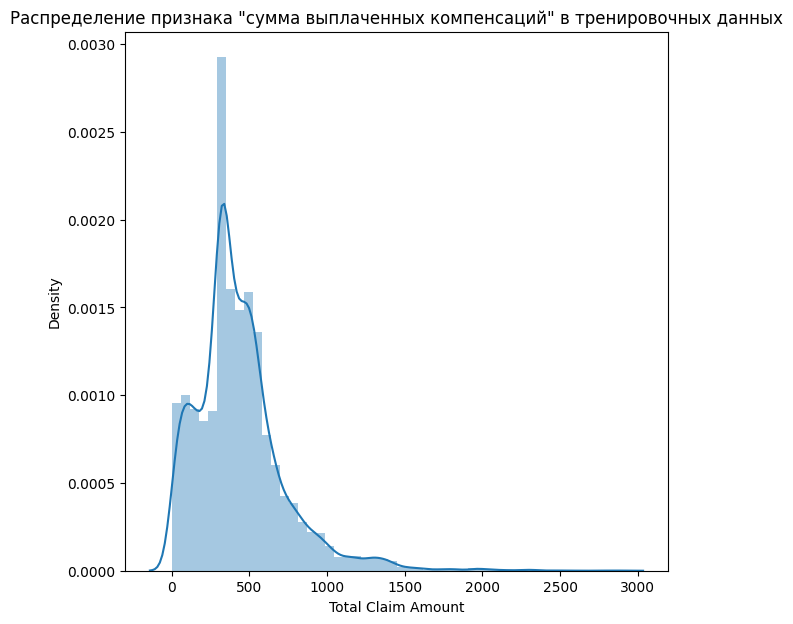

In [18]:
for col in num_cols:
    plt.figure(figsize = (7, 7))
    plt.title(f'Распределение признака "{dict_col[col]}" в тренировочных данных')
    sns.distplot(train_data[col])

Вывод: Числовые признаки распределены нормально

Распределение строковых признаков

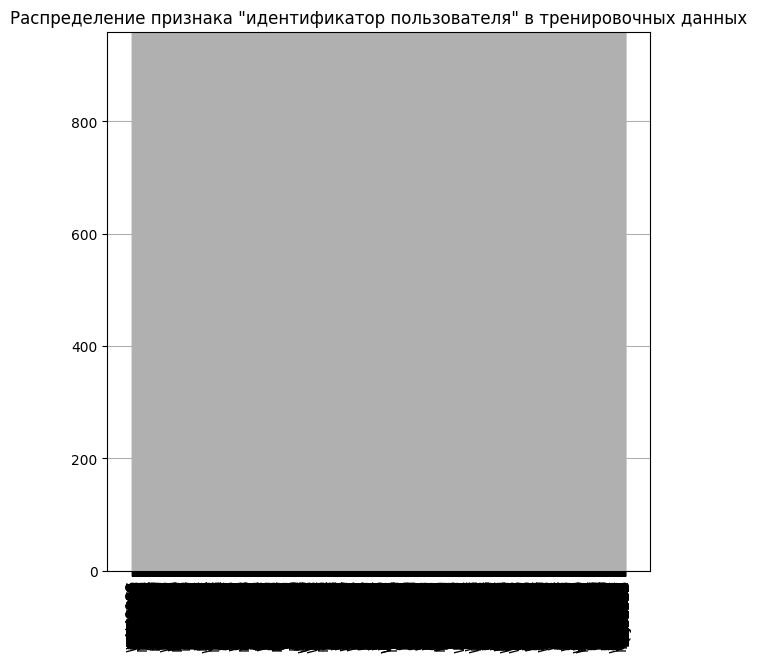

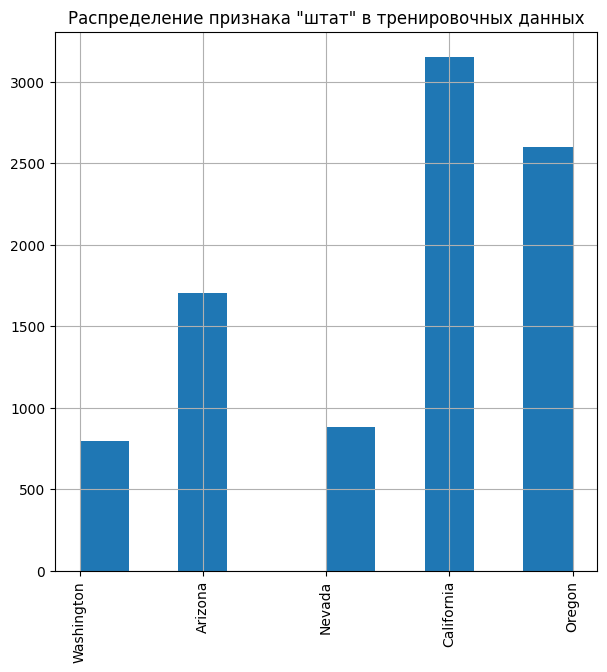

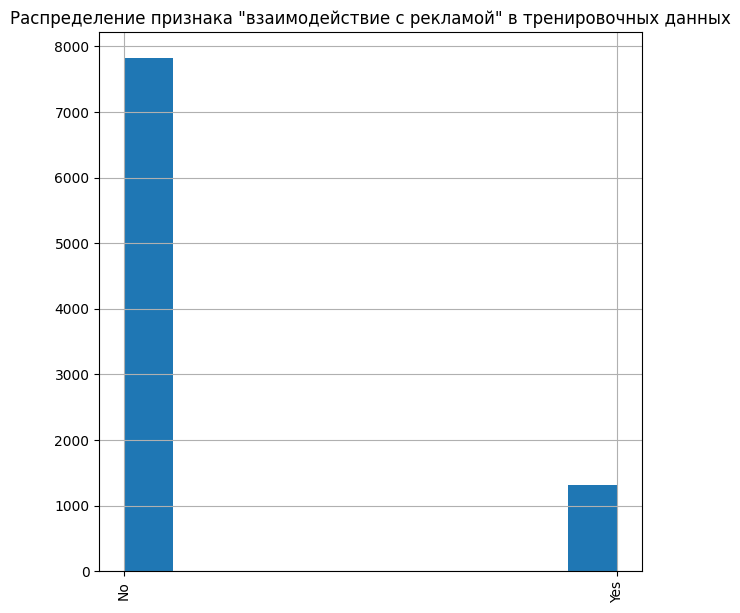

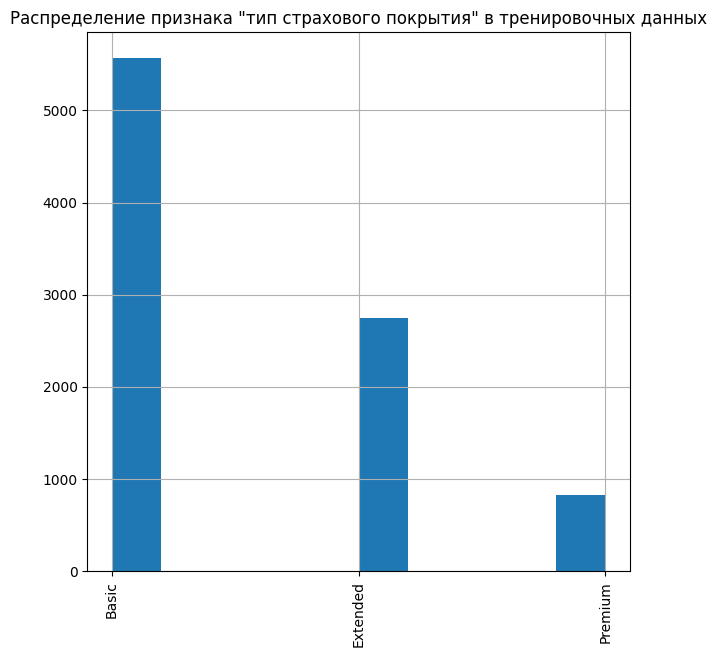

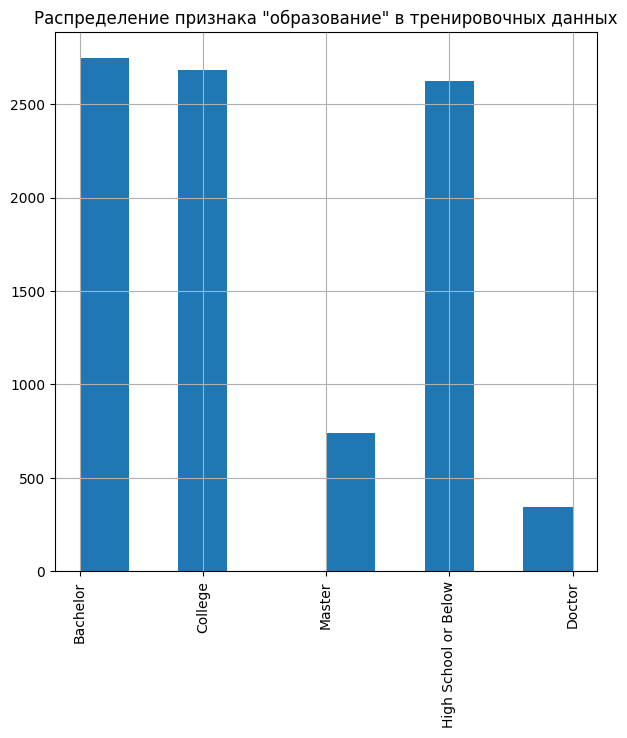

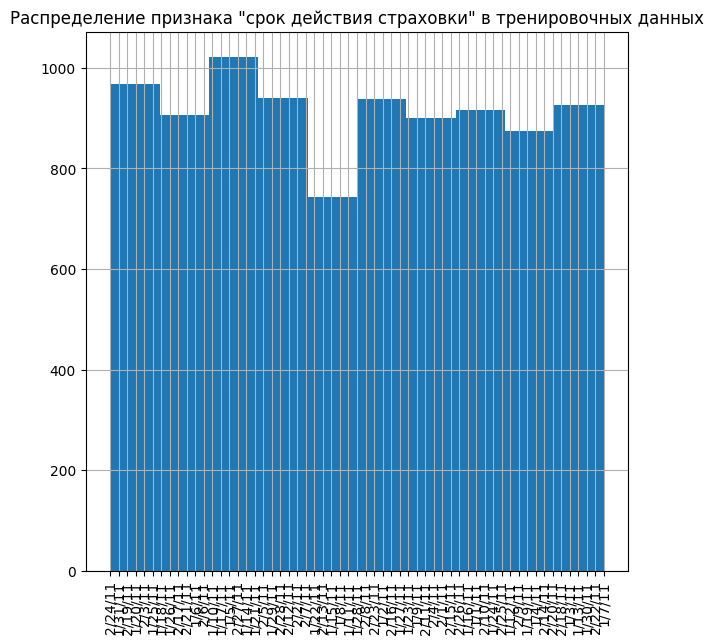

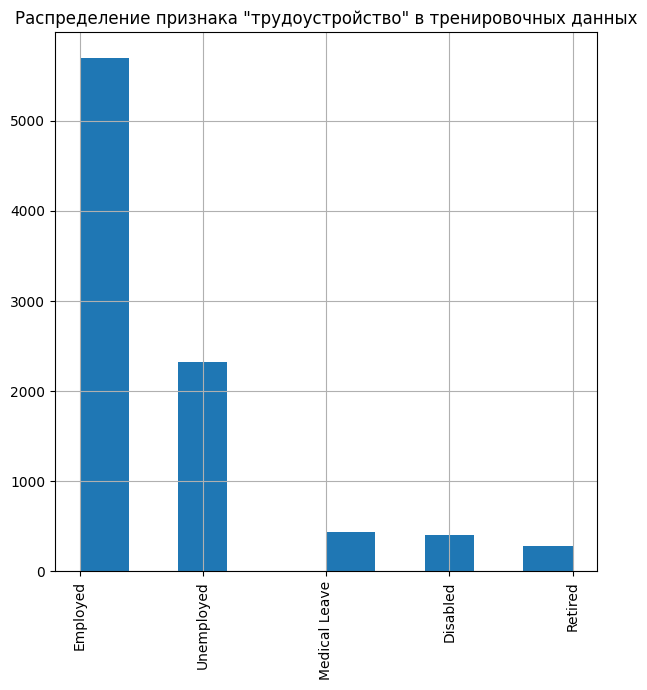

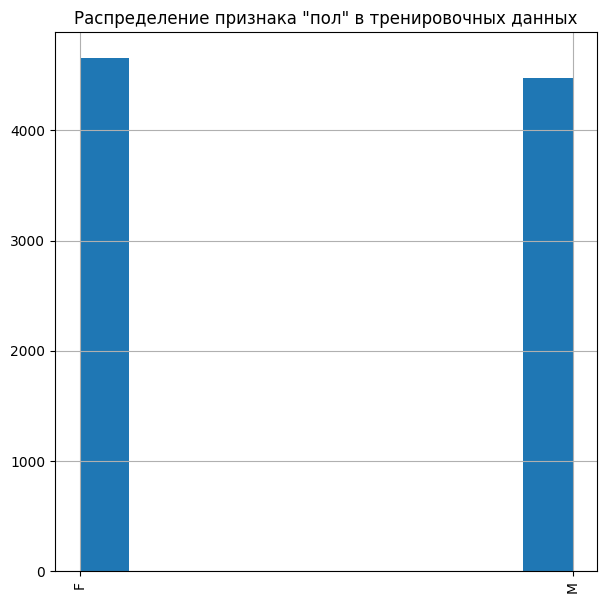

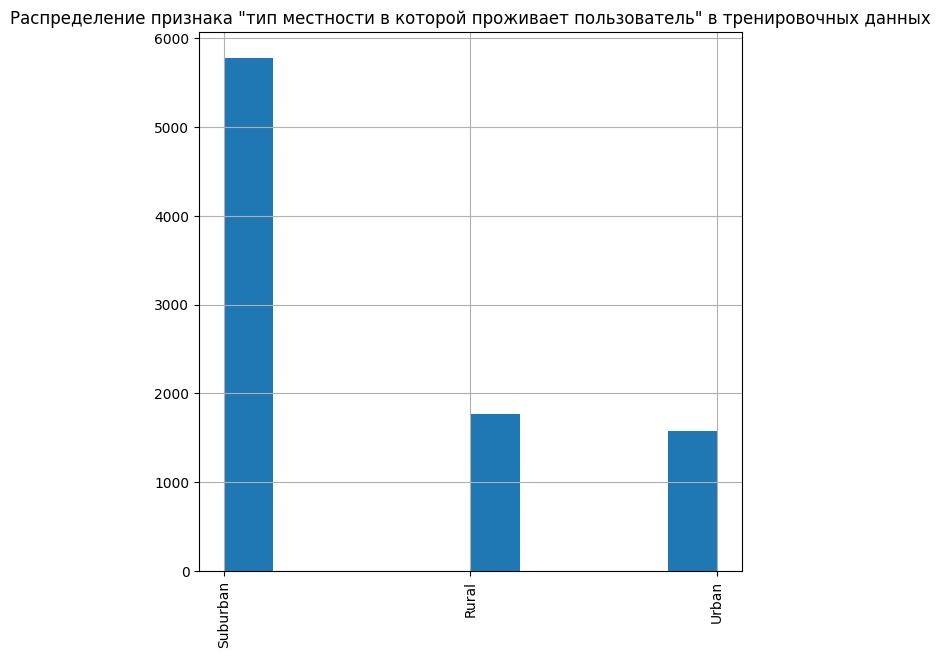

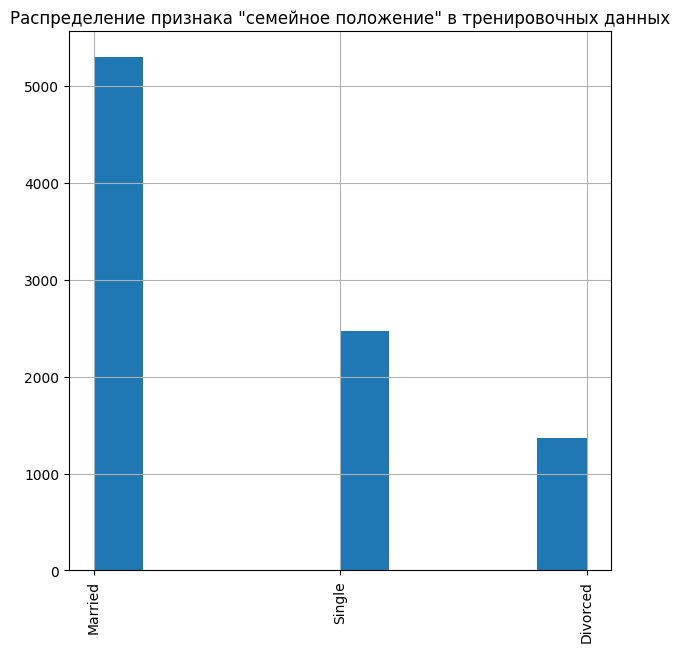

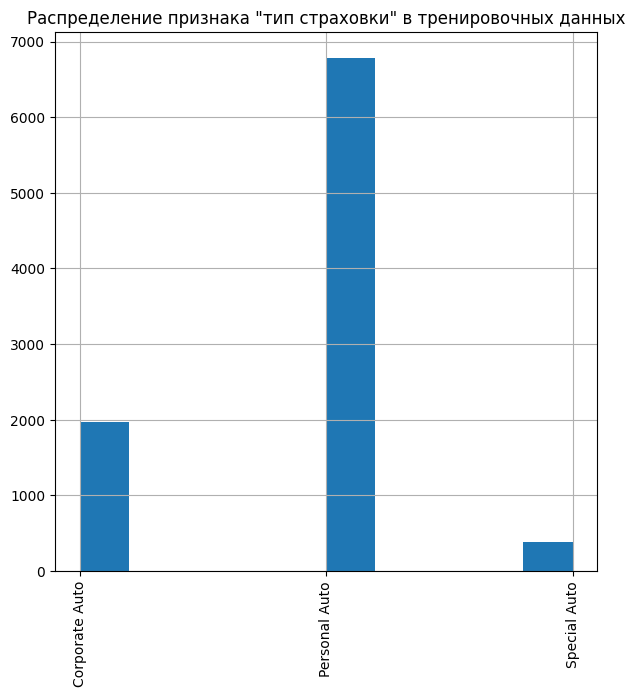

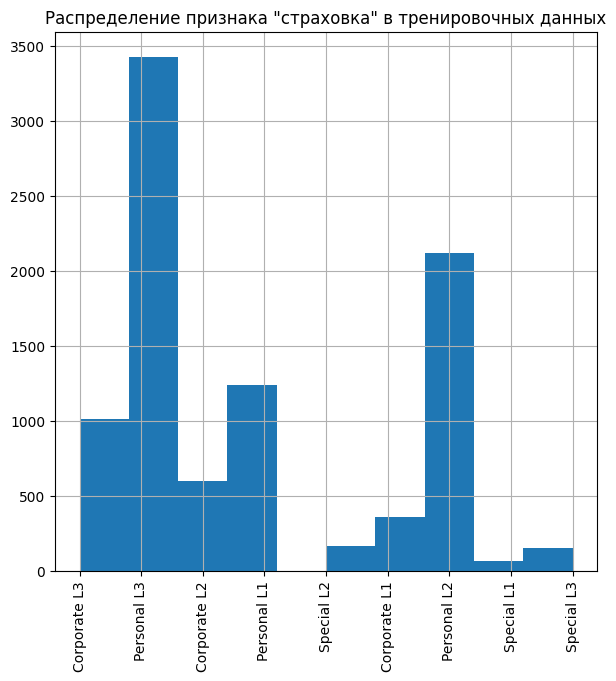

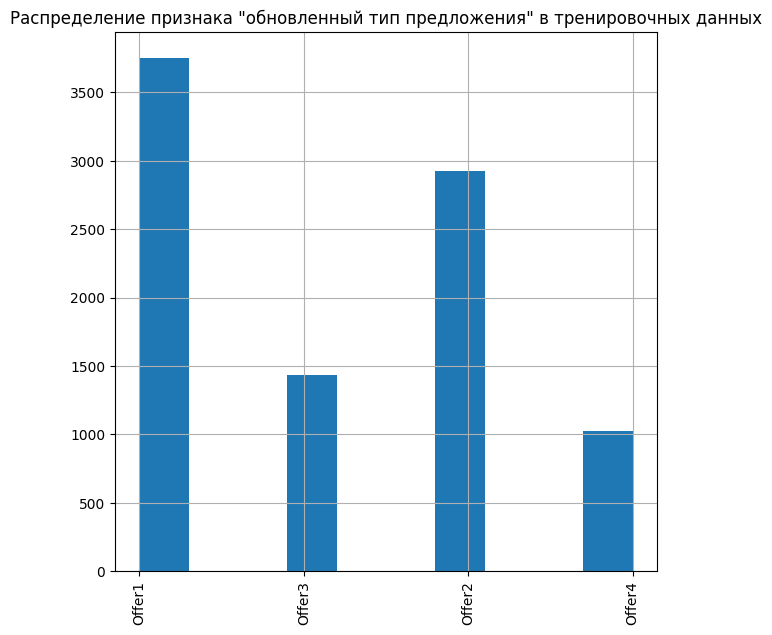

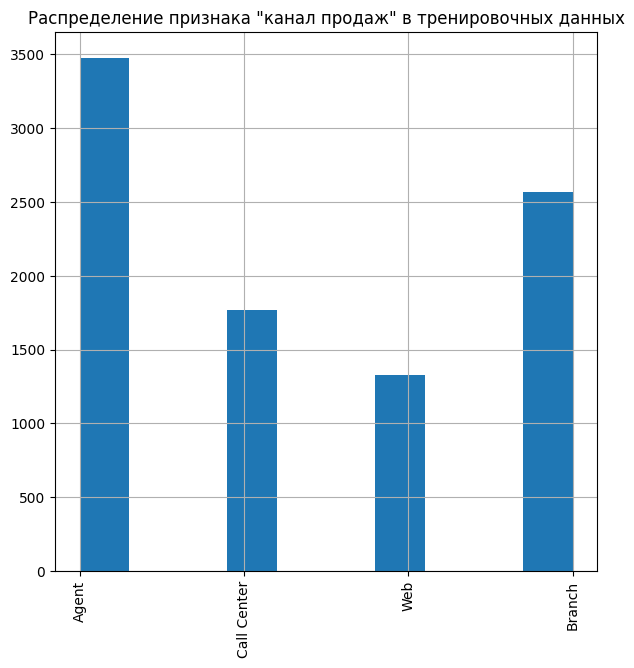

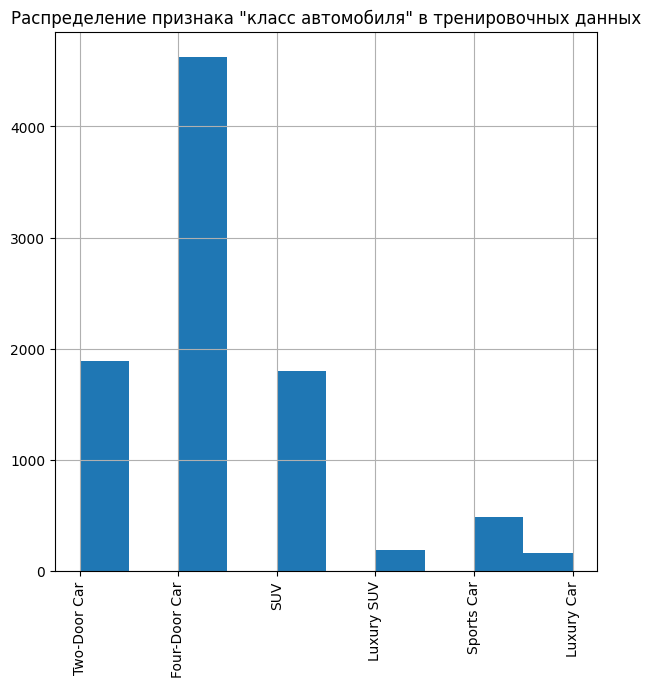

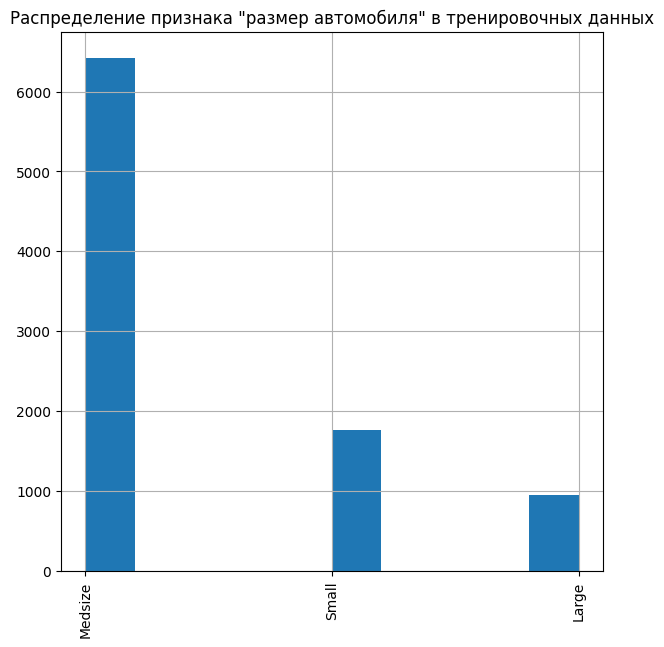

In [20]:
for col in str_cols:
    plt.figure(figsize = (7, 7))
    plt.title(f'Распределение признака "{dict_col[col]}" в тренировочных данных')
    plt.xticks(rotation=90)
    train_data[col].hist()

### Предобработка признаков

Приведение строковых признаков к числовым с помощью LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])

X.sample(10)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6475,5892,2,0,1,3,37,1,1,28311,1,...,70,0,2,1,5,3,1,643.200000,3,1
7980,5358,0,0,0,1,40,1,1,38460,2,...,98,0,1,1,5,0,1,191.365686,0,1
902,346,3,0,1,2,11,1,1,67632,0,...,44,0,4,1,5,0,1,26.951627,4,1
2500,6208,3,0,0,4,11,1,1,55836,2,...,87,0,7,1,5,0,3,314.936185,0,1
4610,7890,3,0,0,0,12,4,1,0,1,...,35,0,5,0,2,1,0,646.785442,0,2
4922,6032,2,1,0,0,3,0,0,23815,1,...,47,0,2,1,3,1,2,424.330166,0,1
59,7019,3,0,2,4,51,0,0,11621,1,...,98,0,1,1,3,0,0,518.400000,0,1
3584,3874,1,0,0,3,51,2,0,13870,1,...,78,0,5,1,5,2,3,550.430985,3,1
2624,6803,4,0,1,4,37,4,1,0,2,...,97,0,1,0,2,0,1,286.115778,0,1
5708,3555,1,0,1,0,2,4,1,0,1,...,5,0,1,1,5,2,1,986.400000,3,1


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   int64  
 1   State                          9134 non-null   int64  
 2   Response                       9134 non-null   int64  
 3   Coverage                       9134 non-null   int64  
 4   Education                      9134 non-null   int64  
 5   Effective To Date              9134 non-null   int64  
 6   EmploymentStatus               9134 non-null   int64  
 7   Gender                         9134 non-null   int64  
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   int64  
 10  Marital Status                 9134 non-null   int64  
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

Прорведем стандартизацию данных

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

Построим матрицу корреляции

In [24]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Customer Lifetime Value'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()
corr_m = np.round(corr_m, 2)
corr_m

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
Customer,1.00,0.01,0.02,-0.01,0.00,-0.00,0.01,0.02,-0.01,0.02,...,-0.01,0.01,-0.02,-0.02,-0.01,-0.01,0.01,-0.00,0.00,-0.03
State,0.01,1.00,-0.00,0.00,0.02,-0.00,0.00,-0.00,0.00,-0.01,...,-0.00,-0.01,0.01,0.01,-0.01,-0.00,0.01,0.01,0.01,0.01
Response,0.02,-0.00,1.00,0.00,0.00,-0.04,-0.02,0.00,0.01,0.00,...,-0.01,-0.02,0.00,-0.00,-0.16,-0.09,0.02,0.02,-0.05,-0.01
Coverage,-0.01,0.00,0.00,1.00,0.02,0.01,0.00,-0.01,-0.01,-0.02,...,-0.01,-0.01,0.00,-0.00,-0.05,-0.02,0.28,-0.02,-0.00,0.17
Education,0.00,0.02,0.00,0.02,1.00,0.00,-0.03,0.00,0.02,-0.01,...,-0.02,0.01,0.01,0.01,0.07,-0.01,0.02,0.01,-0.01,0.03
Effective To Date,-0.00,-0.00,-0.04,0.01,0.00,1.00,-0.00,-0.01,-0.00,-0.00,...,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,-0.02,0.01,-0.01
EmploymentStatus,0.01,0.00,-0.02,0.00,-0.03,-0.00,1.00,0.03,-0.73,0.02,...,0.01,0.01,-0.00,-0.00,-0.12,-0.02,0.33,-0.00,-0.01,-0.03
Gender,0.02,-0.00,0.00,-0.01,0.00,-0.01,0.03,1.00,-0.02,0.00,...,-0.00,0.02,-0.00,-0.00,0.05,-0.02,0.07,0.02,-0.00,-0.01
Income,-0.01,0.00,0.01,-0.01,0.02,-0.00,-0.73,-0.02,1.00,-0.03,...,0.01,-0.01,0.00,0.01,0.14,0.01,-0.36,0.00,0.01,0.02
Location Code,0.02,-0.01,0.00,-0.02,-0.01,-0.00,0.02,0.00,-0.03,1.00,...,-0.00,0.00,0.02,0.01,-0.02,-0.00,0.25,0.00,0.02,0.00


Визуализируем матрицу при помощи sns.heatmap

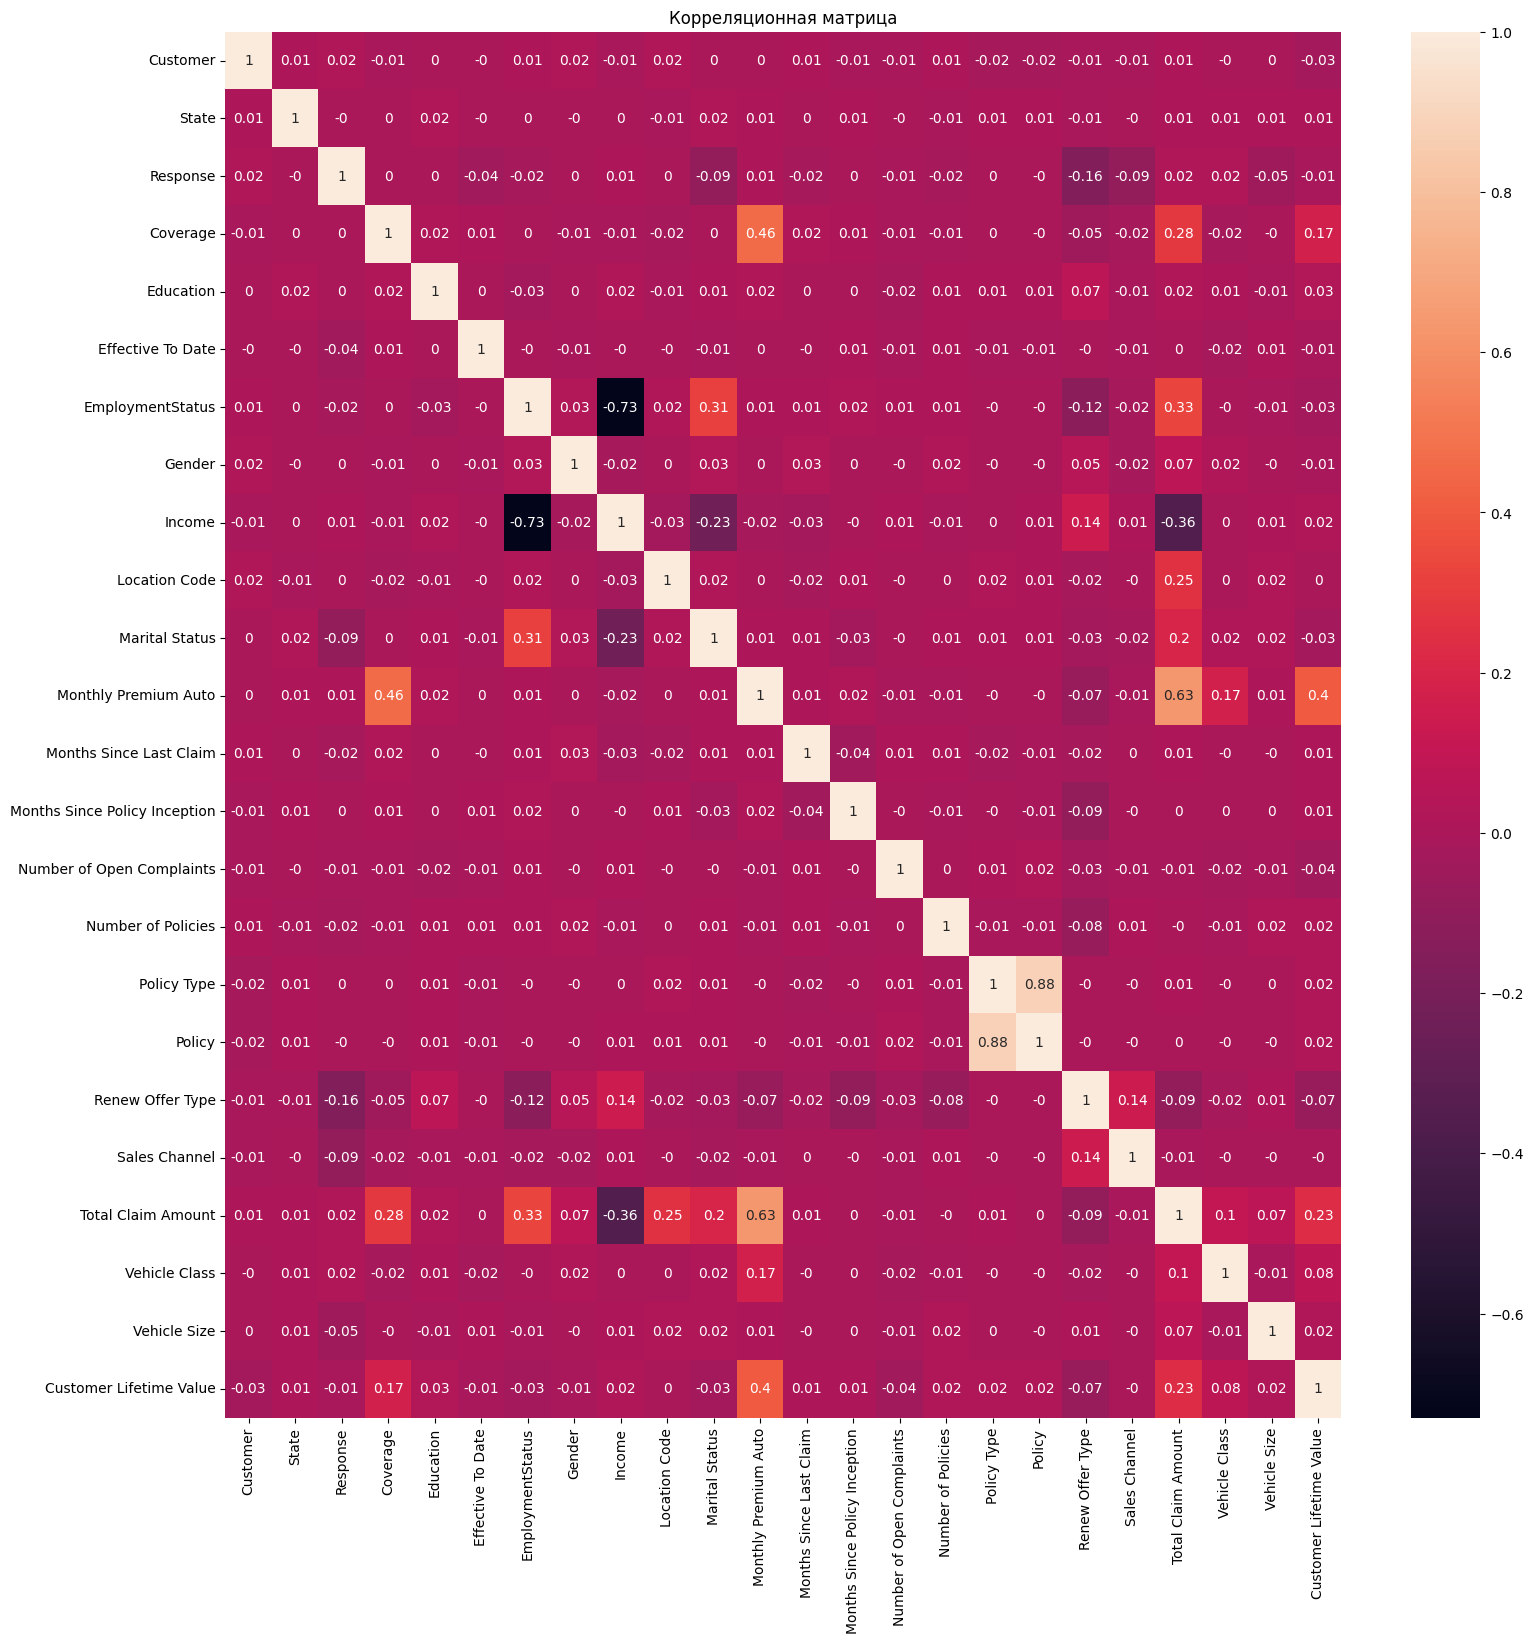

In [25]:
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

Вывод: Наиболее зависимы друг от друга признаки "Policy" и "Policy type" (коэффициент корреляции 0,88) а также "Total Claim Amount" и "Monthly Premium Auto" (коэффициент корреляции 0,63)